In [13]:
import torch
from torch.nn import functional
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
#datset
data=pd.read_csv("dataset/Iris.csv")
data['Species'] = data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
X = data[['SepalLengthCm', 'SepalWidthCm']].values.tolist()
y = list(data['Species'])
print("len of X: ",len(X))
print("len of y: ",len(y))
print(X[:5])
print(y[:5])
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)
torch.manual_seed(42)
shuffle_indices= torch.randperm(len(y),dtype=torch.long)
X=X[shuffle_indices]
y=y[shuffle_indices]
x_train,x_test=X[:120],X[120:]
y_train,y_test=y[:120],y[120:]
# Standarization
mu = x_train.mean(dim=0)
sigma = x_train.std(dim=0)
X_train = (x_train - mu) / sigma
X_test = (x_test - mu) / sigma

len of X:  150
len of y:  150
[[5.1, 3.5], [4.9, 3.0], [4.7, 3.2], [4.6, 3.1], [5.0, 3.6]]
[0, 0, 0, 0, 0]


In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device
# device='cpu'

device(type='cuda', index=0)

In [16]:
class softmax_regression_manual():
    def __init__(self, features=2, classes=3):
        self.features=features
        self.classes=classes
        self.weights=torch.zeros(self.classes,self.features, dtype=torch.float32, device=device)
        self.bias=torch.zeros(self.classes, dtype=torch.float32, device=device)
    

 
    def one_hot_encoding(self,y, classes):
        y_onehot = torch.zeros(y.size(0), classes)
        y_cpu = y.to(torch.device('cpu'))
        y_onehot.scatter_(1, y_cpu.view(-1, 1).long(), 1).float()
        return y_onehot.to(device)

    def softmax(self, x):
        softm=(torch.exp(x.t())/torch.sum(torch.exp(x), dim=1)).t()
        return softm

    def cross_entropy(self,res, y_enc):
        return - torch.sum(torch.log(res) * (y_enc), dim=1)
    
    def forward(self, x):
        x_w =torch.matmul(x,self.weights.t())+ self.bias
        probs=self.softmax(x_w)
        return x_w,probs

    def backward(self, x, y, probs):  
        loss_y=y-probs
        grad_loss_weights = - torch.matmul(x.t(),loss_y).t()
        grad_loss_bias = - torch.sum(loss_y)
        return grad_loss_weights, grad_loss_bias

    
    def perdicted_labels(self, x):
        logits,probs = self.forward(x) 
        labels = torch.argmax(probs, dim=1)
        return labels    
  
    def evaluation(self, x,y):
        y_pred=self.perdicted_labels(x).float()
        acc=sum(p == t for p, t in zip(y_pred, y))/len(y)
        return acc



    def train(self, x, y, epochs, lr=0.01):
        error_per_epoch=[]
        for e in range(epochs):
            y_onehot = self.one_hot_encoding(y, self.classes)
            _,probs = self.forward(x)
            grad_w, grad_b = self.backward(x, y_onehot, probs)

            self.weights -= (grad_w /len(y)) * lr

            self.bias -=  (grad_b / len(y)) * lr

            
            _,probas = self.forward(x)
        

            loss = torch.mean(self.cross_entropy(probas, y_onehot))
            acc=self.evaluation(x,y)

            print(f"Epoch : {e}  ; Current loss: {loss:.2f}; Accuracy: {acc:.2f}")
            error_per_epoch.append(loss.item())
        return error_per_epoch
   

In [17]:
x_train=torch.tensor(X_train,device=device, dtype=torch.float32)
y_train=torch.tensor(y_train,device=device, dtype=torch.float32)
model1=softmax_regression_manual(2,3)
loss=model1.train(x_train,y_train, epochs=50)
print("weights: ",model1.weights.tolist())
print("bias: ",model1.bias.tolist())


C:\Users\HP\AppData\Local\Temp\ipykernel_8280\2755753144.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train=torch.tensor(X_train,device=device, dtype=torch.float32)
C:\Users\HP\AppData\Local\Temp\ipykernel_8280\2755753144.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train=torch.tensor(y_train,device=device, dtype=torch.float32)


Epoch : 0  ; Current loss: 1.10; Accuracy: 0.76
Epoch : 1  ; Current loss: 1.09; Accuracy: 0.76
Epoch : 2  ; Current loss: 1.09; Accuracy: 0.76
Epoch : 3  ; Current loss: 1.08; Accuracy: 0.76
Epoch : 4  ; Current loss: 1.08; Accuracy: 0.76
Epoch : 5  ; Current loss: 1.08; Accuracy: 0.76
Epoch : 6  ; Current loss: 1.07; Accuracy: 0.76
Epoch : 7  ; Current loss: 1.07; Accuracy: 0.76
Epoch : 8  ; Current loss: 1.07; Accuracy: 0.76
Epoch : 9  ; Current loss: 1.06; Accuracy: 0.76
Epoch : 10  ; Current loss: 1.06; Accuracy: 0.76
Epoch : 11  ; Current loss: 1.06; Accuracy: 0.76
Epoch : 12  ; Current loss: 1.06; Accuracy: 0.76
Epoch : 13  ; Current loss: 1.05; Accuracy: 0.76
Epoch : 14  ; Current loss: 1.05; Accuracy: 0.76
Epoch : 15  ; Current loss: 1.05; Accuracy: 0.76
Epoch : 16  ; Current loss: 1.04; Accuracy: 0.76
Epoch : 17  ; Current loss: 1.04; Accuracy: 0.76
Epoch : 18  ; Current loss: 1.04; Accuracy: 0.76
Epoch : 19  ; Current loss: 1.03; Accuracy: 0.76
Epoch : 20  ; Current loss: 1.

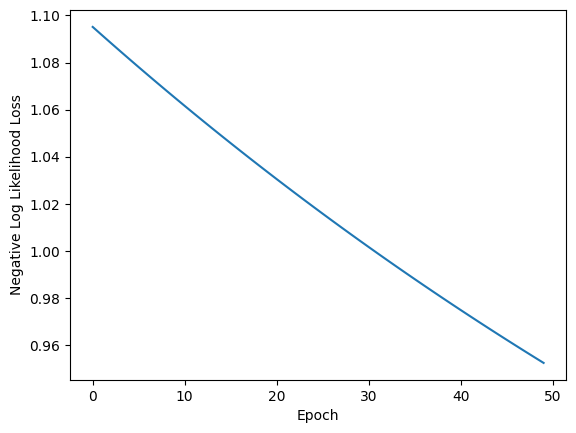

In [18]:
plt.plot(loss)
plt.ylabel('Negative Log Likelihood Loss')
plt.xlabel('Epoch')
plt.show()

In [19]:
X_test= torch.tensor(X_test, dtype=torch.float32, device=device)
y_test = torch.tensor(y_test, dtype=torch.float32, device=device)
acc=model1.evaluation(X_test,y_test)
print("Accuracy: ",acc.item())

Accuracy:  0.8333333730697632


C:\Users\HP\AppData\Local\Temp\ipykernel_8280\3272996646.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test= torch.tensor(X_test, dtype=torch.float32, device=device)
C:\Users\HP\AppData\Local\Temp\ipykernel_8280\3272996646.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32, device=device)


In [20]:
from matplotlib.colors import ListedColormap
import numpy as np


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T, device=device).float()
    probas = classifier.forward(tensor)
    Z = np.argmax(probas.tolist(), axis=1)

    cmap = ListedColormap(colors[:len(np.unique(y))])
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    print("X.devic: ",X.device)
    # print("X.devic: ",X.device)
    print("y.devic: ",y.device)


    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

C:\Users\HP\AppData\Local\Temp\ipykernel_8280\154719348.py:14: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
C:\Users\HP\AppData\Local\Temp\ipykernel_8280\154719348.py:15: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.arange(x2_min, x2_max, resolution))
C:\Users\HP\AppData\Local\Temp\ipykernel_8280\154719348.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotl

X.devic:  cpu
y.devic:  cpu


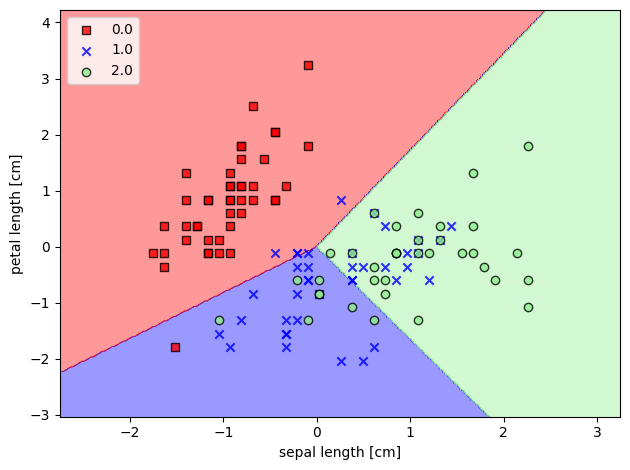

In [8]:
plot_decision_regions(X_train, y_train.to('cpu'), classifier=model1)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


### High Level Implementation of softmax regression

In [21]:
class Softmax_regression(torch.nn.Module):
    def __init__(self, num_features=2, classes=3):
        super(Softmax_regression, self).__init__()
        self.layer=torch.nn.Linear(num_features,classes)
        self.classes=classes
        self.layer.weight.detach().zero_()
        self.layer.bias.detach().zero_()
    
    def forward(self, x):
        logits=self.layer(x)
        probs=functional.softmax(logits, dim=1)
        return logits,probs
    
    # def perdicted_labels(self, x):
    #     probs = self.forward(x) 
    #     labels = torch.argmax(probs, dim=1)
    #     return labels    
  
    # def evaluation(self, x,y):
    #     y_pred=self.perdicted_labels(x).float()
    #     acc=sum(p == t for p, t in zip(y_pred, y))/len(y)
    #     return acc
    

    
def accuracy(y, pred_prob):
    pred_prob=pred_prob.view(-1).float()
    y_pred=torch.where(pred_prob >= 0.5, 1, 0)
    acc=sum(p == t for p, t in zip(y_pred.float(), y.float()))/len(y)
    acc = torch.sum(y.view(-1).float() == pred_prob.float()).item() / y.size(0)
    return torch.tensor(acc)




def train(X,y,model, epochs=10, lr=0.01):
    loss_per_epoch=[]
    optimizer = torch.optim.SGD(model.parameters(), lr=lr) 

    for e in range(epochs):
        logits,_=model(X)
        loss=functional.cross_entropy(logits, y.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _,y_pred=model(X)
        acc=accuracy(y,torch.argmax(y_pred, dim=1))
        loss=functional.cross_entropy(y_pred, y.long())
        print(f"Epoch : {e}  ; Current loss: {loss:.2f}; Accuracy: {acc:.2f}")
        ls=loss.item()
        loss_per_epoch.append(ls)
    return loss_per_epoch



In [22]:
model2=Softmax_regression().to(device)
X_train = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train = torch.tensor(y_train, dtype=torch.float32, device=device)
loss=train(X_train,y_train,model2,epochs=50)
print("weights: ",model2.layer.weight)
print("bias: ",model2.layer.bias)


C:\Users\HP\AppData\Local\Temp\ipykernel_8280\783230430.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32, device=device)
C:\Users\HP\AppData\Local\Temp\ipykernel_8280\783230430.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32, device=device)


Epoch : 0  ; Current loss: 1.10; Accuracy: 0.76
Epoch : 1  ; Current loss: 1.10; Accuracy: 0.76
Epoch : 2  ; Current loss: 1.10; Accuracy: 0.76
Epoch : 3  ; Current loss: 1.09; Accuracy: 0.76
Epoch : 4  ; Current loss: 1.09; Accuracy: 0.76
Epoch : 5  ; Current loss: 1.09; Accuracy: 0.76
Epoch : 6  ; Current loss: 1.09; Accuracy: 0.76
Epoch : 7  ; Current loss: 1.09; Accuracy: 0.76
Epoch : 8  ; Current loss: 1.09; Accuracy: 0.76
Epoch : 9  ; Current loss: 1.09; Accuracy: 0.76
Epoch : 10  ; Current loss: 1.09; Accuracy: 0.76
Epoch : 11  ; Current loss: 1.08; Accuracy: 0.76
Epoch : 12  ; Current loss: 1.08; Accuracy: 0.76
Epoch : 13  ; Current loss: 1.08; Accuracy: 0.76
Epoch : 14  ; Current loss: 1.08; Accuracy: 0.76
Epoch : 15  ; Current loss: 1.08; Accuracy: 0.76
Epoch : 16  ; Current loss: 1.08; Accuracy: 0.76
Epoch : 17  ; Current loss: 1.08; Accuracy: 0.76
Epoch : 18  ; Current loss: 1.08; Accuracy: 0.76
Epoch : 19  ; Current loss: 1.08; Accuracy: 0.76
Epoch : 20  ; Current loss: 1.

In [24]:
X_test = X_test.to(device)
y_test = y_test.to(device)

_,test_pred=model2(X_test)
acc=accuracy(y_test,torch.argmax(test_pred, dim=1).float())
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.80


In [ ]:
# count=0
# kk=torch.argmax(test_pred, dim=1).float()
# for i in range(len(y_test)):
#     if y_test[i]==kk[i]:
#         count+=1
# print(count)

24


In [ ]:
# model2.evaluation(X_test,y_test)

tensor(0.8000, device='cuda:0')